In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy as np
from numpy.linalg import norm
from cmaps import *
from spin_ring_api import * 

In [ ]:
r_label = '$r_\mathrm{trunc}$'

betas = [1000, 100, 50, 10]
truncs = np.arange(9)
truncs

In [2]:
l = 18
delta = 2

betas = np.arange(0.5, 5.0, 0.5)
print(betas)

truncs = np.arange(2, int(l / 2))

print(truncs)

lowest_evals_beta = []
for beta in betas: 
    lowest_evals = []
    for trunc in truncs: 
        try:
            evals, evecs = get_eigen(True, l, delta, beta, trunc)
            lowest_evals.append(evals[0])
        except Exception as err:
            print(f'Error processing beta={beta}, trunc={trunc}')
            print(Exception, err)
            
    lowest_evals_beta.append(lowest_evals)

zero_temp_evals = []
for trunc in truncs:
	evals, evecs = get_eigen(False, l, delta, beta, trunc)
	zero_temp_evals.append(evals[0])

[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
[2 3 4 5 6 7 8]


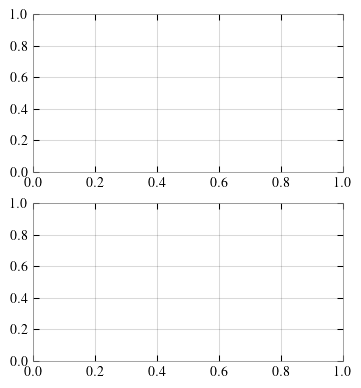

In [3]:
fig, ax = plt.subplots(figsize=(4, 4.5), nrows=2)

In [4]:
# cmap = mpl.colormaps['plasma'].reversed()
cmap_thermal = get_continuous_cmap([
    '#4838a8', 
    '#cb4679', 
    '#f2ec5e',
    ]).reversed()

norm_thermal = mpl.colors.Normalize(vmax=betas[-1], vmin=betas[0])

In [5]:
r = np.linspace(truncs[0], truncs[-1], 100)

ax[0].plot(r, 2.5 * zero_temp_evals[-1] / np.power(r, 2 * delta), color='grey', 
        	linestyle='dashed', alpha=0.85)

for b, ev in zip(np.flip(betas), np.flip(lowest_evals_beta, axis=0)):
    ax[0].scatter(np.flip(truncs), ev,
               color=cmap_thermal(norm_thermal(b)), alpha=0.8)

# NOTE: should say \beta = \infty? maybe instead say "pure state" 
ax[0].scatter(np.flip(truncs), zero_temp_evals, label=f'$\\beta = \\infty$', 
           color='black', alpha=0.4)


In [6]:
ax[0].set_xticks(truncs)
ax[0].set_xlabel(r_label)
ax[0].set_ylabel('$ \lambda_0 $')

Text(4.444444444444448, 0.5, '$ \\lambda_0 $')

In [7]:

cbar = fig.colorbar(cm.ScalarMappable(norm=norm_thermal, cmap=cmap_thermal), location='right', 
                    ticks=betas, ax=ax[0])
cbar.set_label('$\\beta\\Delta E$')
cbar.ax.tick_params(size=2)

ax[0].text(0.04, 0.175, '(a)', transform=ax[0].transAxes,
		fontsize=14, va='top')

Text(0.04, 0.175, '(a)')

In [8]:
import matplotlib.ticker as mticker 

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xticks(truncs)

# Do not use scientific notation for x axis
ax[0].xaxis.set_major_formatter(mticker.ScalarFormatter())

ax[0].legend(frameon=False, loc=(0.1, 0.045))

In [9]:
spec = get_spectrum(l, delta, betas[0])
gap = spec[1] - spec[0]

beta_cont = np.linspace(betas[0], betas[-1], 100)
boltz_function = 4.5 * np.exp(- gap * beta_cont) 
boltz = get_boltzmann(l, delta, betas[-1])


ax[1].plot(beta_cont, boltz_function, color='grey', linestyle='dashed', alpha=0.85, 
	   		label='$e^{-\\beta\Delta E}$')

cmap = get_continuous_cmap([
	'#632a70',
	'#534699', 
	'#3b739c',
	'#21908d',
	'#35b779',
	'#94cf55',
	'#eddd47'
	]).reversed().resampled(len(truncs))
# cmap = mpl.colormaps['viridis'].reversed().resampled(len(truncs))

norm = mpl.colors.Normalize(vmax=truncs[-1], vmin=truncs[0])

i = 0
for n_ops in np.flip(truncs):
	ax[1].scatter(betas, np.transpose(lowest_evals_beta)[i] - zero_temp_evals[i],
	    # label=f'$\\text{{Truncs.}} = {t}$', 
		alpha=0.8,
		color=cmap(norm(n_ops)))
	i += 1

ax[1].legend()
# ax.set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('$\\beta\\Delta E$')
ax[1].legend(frameon=False, loc='upper right')
ax[1].set_ylabel('$\lambda_{0, \\beta} - \lambda_{0, \\beta = \infty}$')

# ax[1].set_ylim(1.7e-5, 1e2)


ax[1].text(0.04, 0.175, '(b)', transform=ax[1].transAxes,
		fontsize=14, va='top')


Text(0.04, 0.175, '(b)')

In [10]:
cbar = fig.colorbar( cm.ScalarMappable(norm=norm, cmap=cmap), location='right', 
		    ticks=np.arange(2, 9), ax=ax[1])
cbar.set_label(r_label)
cbar.ax.tick_params(size=0)


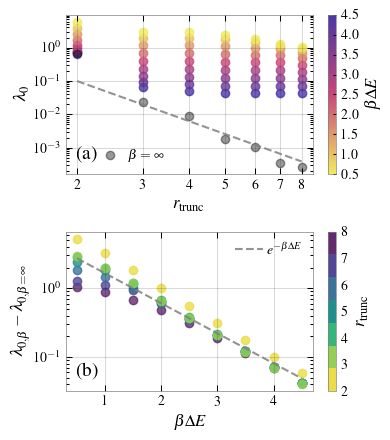

In [11]:
fig.tight_layout()
fig

In [12]:
fig.savefig('../drafts/thermal_plot_v0.pdf')
fig.savefig('../drafts/thermal_plot_v0.png')
fig.get_size_inches() * fig.dpi

array([400., 450.])